<ul> 
    <li> <a href ='https://towardsdatascience.com/principal-component-analysis-part-1-the-different-formulations-6508f63a5553'>Principal Component Analysis Part 1: The Different Formulations.</a> </li>
    <li> <a href='https://medium.com/analytics-vidhya/mathematics-behind-principal-component-analysis-pca-1cdff0a808a9'>The Mathematics Behind Principal Component Analysis </a> </li>
    <li><a href='https://www.cs.princeton.edu/picasso/mats/PCA-Tutorial-Intuition_jp.pdf'>A TUTORIAL ON PRINCIPAL COMPONENT ANALYSIS</a></li>
    <li><a href='http://www.math.union.edu/~jaureguj/PCA.pdf'>Principal component analysis with linear algebra</a></li>
    <li><a href='https://intoli.com/blog/pca-and-svd/'>SVD and PCA </a> </li>
   <li> <a href='http://www.math.ucsd.edu/~gptesler/283/slides/pca_18-handout.pdf'>Principal Components Analysis (PCA)
        and Singular Value Decomposition (SVD) with applications to Microarrays</a> </li>
   <li><a href='https://towardsdatascience.com/singular-value-decomposition-and-its-applications-in-principal-component-analysis-5b7a5f08d0bd'>Singular Value Decomposition and its applications in Principal Component Analysis</a> </li>
    
    
     https://datascienceplus.com/understanding-the-covariance-matrix/

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

# plt.style.use('ggplot')
# plt.rcParams['figure.figsize'] = (12, 8)

<h1> Principle component analysis </h1> 

$$S = Cov(X, Y ) = \sigma(X, Y) = \frac{1}{n-1}\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})$$

<h2>Math behind PCA </h2>

Mathematicaly,the goal of PCA is to find a collection of $k<d$ unit vectors $\vec v_i \in R^d $ called <mark> Principle Components </mark> ,such that: 
<ul>
    <li> The variance of dataset projected onto the direction determined by  $\vec v_i$ is maximized </li> 
      <li>Also $\vec v_i$ is chosen to be orthogonal  $< \vec v_i|\vec v_j>= \delta_{ij}$ </li>

The of vector $x_i$ onto $v_i$ is given by as dot product $v_i^Tx$.This means that the variance of the dataset projected on the first principle $v_1$ can be written as : <br>
$$\frac{1}{n-1} \sum^n_{i=1}(v_1^Tx_i - v_1^T)^2 = v_1^TSv_1 $$ <br>


To actually find $v_1$ we have to maximize this quantity, subject to the additional constraint that $|v|=1$.  Solving this optimization problem using the method of <mark> Lagrange multipliers </mark> turns out to imply that : 
$$ Sv_1 = \gamma_1 v_1 $$
which just means that $v_1$ is an eigenvector of covariance matrix $S$
In fact, since  $|v| =   v_1^T.v_1=1$ we also conclude that the corresponding eigenvalue is exactly equal to the variance of the dataset along $v_1$ i.e.,

$$v_1^TSv_1= \gamma_1 $$

You can continue this process by projecting the data onto a new direction $v_2$ while enforcing the additional constraint that $v_1⊥v_2$ and so on.The end result is that the first $k$ principal components of  X correspond exactly to the eigenvectors of the covariance matrix $S$ ordered by their eigenvalues. Moreover, the eigenvalues are exactly equal to the variance of the dataset along the corresponding eigenvectors.


You may have noticed that this result suggests that there exists a full set of orthonormal eigenvectors for $S$ over  $R$ .

Indeed, since $S$ is a real symmetric matrix, meaning that $S= S^T$
, the <mark>Real Spectral Theorem</mark> implies exactly that. This is a non-trivial result which we will make use of later in the article, so let’s expand on it a little bit. Consider the case of $k=d<n$. Taking 
$k=d$ principal components may seem like a strange choice if our purpose is to understand $X$ through a lower dimensional subspace, but doing so allows us to construct a $d\times d$  matrix $V$ whose columns are the eigenvectors of $S$  and which therefore diagnoalizes $S$ i.e.,

$$ S  = V \Lambda V^T = \sum_{i=1}^r\lambda_iv_i v_i^T$$
whre $\Lambda V diag(\lambda_1,.., \lambda_d)$ and $r = rank(X)$
In other words, the principal components are the columns of a rotation matrix and form the axes of a new basis which can be thought of as “aligning” with the dataset $X$ . Of course, this image works best when 
$X$ is blobby or looks approximately normal.

<img src='https://miro.medium.com/max/462/1*QALwLkPJG45E7_DsOccdaw.png'/>

<h1> Eigenvectors and eigenvalues </h1>

The multiplication of the matrix with vector gives another vector, that is a Linear Transformation, geometrically that is a  transformation. The transformation can produce scaled or rotating of the vector or the both.

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/Eigenvectors-extended.gif/300px-Eigenvectors-extended.gif'/>

The above illustration shows the transformation. We are interested in the vectors in blue because only they are stretched (scaled)   after transformation.their direction does not change. Mathematically that is expressed as : 
<br> <br>
$$ A\vec v_{blue} = \lambda \vec v_{blue}$$ 
<br>
These vectors as $\vec v_{blue}$ after applying transformation $A$ their direction does not change. Such vectors are called  eigenvectors with coresponding $\lambda$ eigenvalue.

The vector space spanned by an eigenvector is called an <mark> eigenspace </mark>. The vector space spanned by an eigenvector is called an eigenspace. 

<h2> Diagonalizable matrix. Eigendecomposition. Deffinion and Example </h2>

An $n×n$-matrix $A$ is said to be diagonalizable if it can be written on the form
<br> <br>
$$A=V\Lambda V^{-1}$$ 
<br> 
where $\Lambda$ is a diagonal $n×n$ matrix with the eigenvalues of $A$ as its entries and $P$ is a nonsingular $n×n$ matrix consisting of the eigenvectors corresponding to the eigenvalues in $D$.<br>
The diagonalization theorem states that an $n×n$ matrix $A$ is diagonalizable if and only if $A$ has $n$ linearly independent eigenvectors, i.e., if the matrix rank of the matrix formed by the eigenvectors is n. Matrix diagonalization (and most other forms of matrix decomposition) are particularly useful when studying linear transformations, discrete dynamical systems, continuous systems, and so on.

Let consider the matrix $ A = \begin{bmatrix} 
 1 & 2 &  0 \\
 0 & 3  & 0  \\
 2 & -4  & 2   \\
\end{bmatrix} $. <br> <br> The matrix $A$ has eigenvalues $\lambda_2=3$,$\lambda_2= 3$,$\lambda_3=1$.$A$ is a $3\times3$ different eigenvalues therefore, it is diagonalizable.<br>
Note that if there are exactly $n$ distinct eigenvalues in an $n×n$ matrix then this matrix is diagonalizable.These eigenvalues are the values that will appear in the diagonalized form of matrix , so by finding the
eigenvalues of we have diagonalized it. We could stop here, but it is a good check to use the eigenvectors
to diagonalize .
The eigenvectors of $A$ are :

 $$ \vec v_1 = \begin{bmatrix} 
 -1  \\
 -1  \\
 2   \\
\end{bmatrix} ,
 \vec v_1 = \begin{bmatrix} 
 0  \\
 0  \\
 1   \\
\end{bmatrix} , \vec v_1 = \begin{bmatrix} 
 -1  \\
 0  \\
 2   \\
\end{bmatrix} $$ .

One can easily check that : $ A\vec v_i = \lambda \vec v_i$ 

Now, let $V$ be the matrix stacked with these eigenvectors as its columns:
$$ A = \begin{bmatrix} 
 -1 & 0 &  -1 \\
 -1 & 0  & 0   \\
 2 & 1  & 2   \\
\end{bmatrix}  $$

Note there is no preferred order of the eigenvectors in P; changing the order of the eigenvectors in P just
changes the order of the eigenvalues in the diagonalized form of A

Note there is no preferred order of the eigenvectors in $V$; changing the order of the eigenvectors in $V$ just
changes the order of the eigenvalues in the diagonalized form of $A$.

Then $V$ diagonalizes A, as a simple computation confirms, having calculated $V^{ -1}$ using any suitable method: <br> <br>
$V^{ -1}AV^{ 1} = \begin{bmatrix} 
 0 & -1 &  0 \\
 2 & 0  & 1   \\
 -1 & 1  & 0   \\
\end{bmatrix}   \begin{bmatrix} 
 1 & 2 &  0 \\
 0 & 3  & 0  \\
 2 & -4  & 2   \\
\end{bmatrix}  \begin{bmatrix} 
 -1 & 0 &  -1 \\
 -1 & 0  & 0   \\
 2 & 1  & 2   \\
\end{bmatrix} = \begin{bmatrix} 
 3 & 0 &  0 \\
 0 & 2  & 0   \\
 0 & 0  & 1   \\
\end{bmatrix} $ <br> <br>
Note that the eigenvalues $\lambda_i$ appear in the diagonal matrix

by simple operation we can obtain formula for diagonalize <br> <br> $V^{ -1}AV^{ 1}= \Lambda$  <br>
$ V V^{ -1}AV^{ 1} =  V \Lambda   $ $\scriptsize  \; multiply \; left\; sizes \; by \; V$  <br>
$ AV^{ 1}= V \Lambda   $  $\scriptsize  \; multiply \; right\; sizes \; by \; V ^{-1}$<br>
$ AV^{ 1}V^{ -1}= V \Lambda V^{ -1}  $ <br>
$ A = V \Lambda V^{ -1}  $

For <mark>symetric matrix</mark> $A = A^T $ 


Properties of <mark> symmetric matrices </mark>
I Recall that a matrix $A ∈ R^{n×n}$ is symmetric if $A^T = A$. <br> <br>
I For real symmetric matrices we have the following two
crucial properties:
<ul>
    <li> All eigenvalues of a real symmetric matrix are real.</li>
<li>  Eigenvectors corresponding to distinct eigenvalues are
orthogonal</li>
 </ul> <br> <br>
 The orthogonality ff Eigenvectors can be expressed as : <br>
 
 $V.V^T=1$ since $V.V^{-1}=1$  then  $V^T=V^{-1}$ <br>
 according to above if the matrix $A$ is symtrix its diagonalizable form can be written :  <br> <br>
 $$ A = V \Lambda V^{T}  $$
 

<h2> NumPy example of  matrix diagonalization  </h2>  

In [322]:
A = np.array([[2,3],[3,1]])
eigen_values , V = np.linalg.eig(A)
print("eigen values : " , eigen_values.T)
print("eigen vectors stacked V : " )
print(V)

eigen values :  [ 4.54138127 -1.54138127]
eigen vectors stacked V : 
[[ 0.76301998 -0.6463749 ]
 [ 0.6463749   0.76301998]]


In [319]:
Lambda = np.diag(eigen_values, k=0) #diagonal matrix Lambda
Lambda

array([[ 4.54138127,  0.        ],
       [ 0.        , -1.54138127]])

In [321]:
V.dot(Lambda).dot(V.T) # V.Lambda.V^T

array([[2., 3.],
       [3., 1.]])

<h2> Singular Value Decomposition </h2>

Diagonalizing a matrix is called in common as Eigendecomposition of a Matrix.Diagonalizing a matrix is called in common as Eigendecomposition of a Matrix.However, this eigendecomposition is limited to a certain set of matrices. The actual motivation for Singular Value Decomposition arises from the drawbacks of eigendecomposition:
<ul>
    <li>The concept of eigenvalues is only applicable to square matices. </li>
    <li>The concept of eigenvalues is only applicable to square matices. </li>
<ul>    

To overcome the challenges from eigendecomposition of a matrix, the need of more generic representation of any matrices arises and that’s where Singular Value Decomposition comes into play.Let $A$ be any rectangular matrix of shape $(m x n)$ . We can show that both AᵀA and AAᵀ are symmetric square matrices of shapes $(n x n)$ and $(m x m)$ respectively using the axiom <mark> $(AB)^T = B^TA^T$ </mark> . <br> <br>
$$(A^TA) = A^T(A^T)^T = A^TA$$ <br>
$$(AA^T)^T = (A^T)^T(A^T) = AA^T$$

Moreover, it also can be shown that both $AᵀA$ and $AAᵀ$ share the same non-zero eigenvalues. If one has more eigenvalues than the other, all of the excess eigenvalues should be zero.

Let $A^TAv=\lambda v$ $\scriptsize  \; multiply \;both \; sizes \; by \; A$ <br> <br>
 $AA^TAv=\lambda A v$ 



According to the othogonally diagonalizable property of symmetric matrices that we've saw, the matrices $AᵀA$ and $AAᵀ$ can be decomposed as following : <br> <br> 
$$A^TA = V\Lambda V^T $$ <br>
$$AA^T = U\Lambda U^T $$

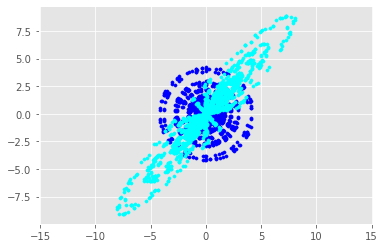

In [302]:
#alpha = (np.linspace(0,360,num=20)/360)*2*np.pi
alpha = (np.random.randint(0,360,size=50))/360*2*np.pi
r = np.linspace(0,2,num=25)
r = np.random.normal(scale=2.0,size=35)
x= np.multiply.outer(np.sin(alpha), r).flatten()
y= np.multiply.outer(np.cos(alpha),r).flatten()
X = np.vstack((x,y)).T
Tranform = np.array([[1.5,1.2] ,[1.2,1.8]])
X_t =X.dot(Tranform) 
plt.axis('equal')
plt.scatter(X[:, 0], X[:, 1],color='blue',s=10)
plt.scatter(X_t[:, 0], X_t[:, 1],color='cyan',s=10)

<h2>Singular Value Decomposition </h2>

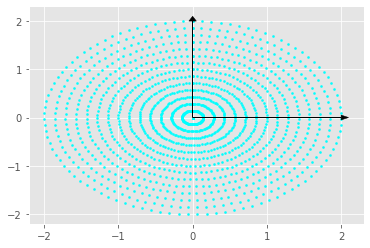

In [238]:
#generate data 

plt.scatter(X[:, 0], X[:, 1],color='cyan',s=4)
#
ax = plt.gca()
#plt.scatter(x,y,color='b')
#np.linalg.eig(X)
ax.arrow(0,0,0,2, head_width=0.1, head_length=0.1, fc='black', ec='black')
ax.arrow(0,0,2,0, head_width=0.1, head_length=0.1, fc='black', ec='black')

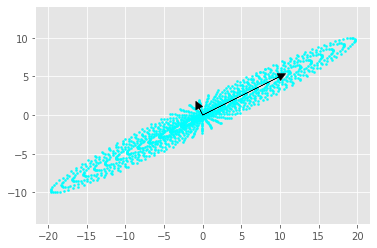

4.919349550499537

In [239]:
Tranform = np.array([[9,4] ,[4,3]])
X_t =X.dot(Tranform)   
plt.scatter(X_t[:, 0], X_t[:, 1],color='cyan',s=4)
plt.axis('equal')
#e_v,e_vect = np.linalg.eig(np.cov(Tranform))
e_v,e_vect = np.linalg.eig(Tranform)
#e_vect = e_vect*100
ax = plt.gca()
#ax.arrow(0,0,e_v[0]*e_vect[0,0],e_v[1]*e_vect[1,0], head_width=1, head_length=1, fc='black', ec='black')
#ax.arrow(0,0,e_v[1]*e_vect[0,1],e_v[1]*e_vect[1,1], head_width=1, head_length=1, fc='black', ec='black')
ax.arrow(0,0,e_v[0]*e_vect[0,0],e_v[0]*e_vect[1,0], head_width=1, head_length=1, fc='black', ec='black')
ax.arrow(0,0,e_v[1]*e_vect[0,1],e_v[1]*e_vect[1,1], head_width=1, head_length=1, fc='black', ec='black')
#ax.arrow(0,0,100,70, head_width=1, head_length=1, fc='black', ec='black')
plt.show()

e_v[0]*e_vect[1,0]

In [ ]:
# L = np.array([[1,0]
#             ,[0,2]])
# theta =(1/4)*np.pi
# c, s = np.cos(theta), np.sin(theta)
# Rot = np.array([[c, -s], [s, c]])
# Tranform = L.dot(Rot)

The singular value decomposition of matrix A is factorization of A into the product of three matrices $A = UDV^T$ where the columns of U and V are orthonormal.We will show that from the singular value decomposition of $A$, we can get the matrix B of rank k which best approximates $A$  in fact we can do this for every k . Also, singular value decomposition is defined for all matrices (rectangular or square)
unlike the more commonly used spectral decomposition in Linear Algebra.The reader
familiar with eigenvectors and eigenvalues (we do not assume familiarity here) will also
realize that we need conditions on the matrix to ensure orthogonality of eigenvectors.The reader
familiar with eigenvectors and eigenvalues (we do not assume familiarity here) will also
realize that we need conditions on the matrix to ensure orthogonality of eigenvectors

 $$ \vec v_1 = \begin{bmatrix} 
 -1  \\
 -1  \\
 2   \\
\end{bmatrix} ,
 \vec v_1 = \begin{bmatrix} 
 0  \\
 0  \\
 1   \\
\end{bmatrix} , \vec v_1 = \begin{bmatrix} 
 -1  \\
 0  \\
 2   \\
\end{bmatrix} $$ .

<h1> Eigen vectors and eigen values </h1>